# 군집 알고리즘

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Duplicate key in file '/Users/yonghyunpark/.matplotlib/matplotlibrc', line 2 ('backend: TkAgg')


In [2]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2021-07-08 20:42:10--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2021-07-08 20:42:10--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 15.164.81.167
Connecting to github.com (github.com)|15.164.81.167|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2021-07-08 20:42:11--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... con

In [3]:
fruits = np.load("fruits_300.npy")

In [4]:
print(fruits.shape)

(300, 100, 100)


In [5]:
print(fruits[0,0,:]) # 첫번째 이미지의 첫번째 행

[  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   2   1
   2   2   2   2   2   2   1   1   1   1   1   1   1   1   2   3   2   1
   2   1   1   1   1   2   1   3   2   1   3   1   4   1   2   5   5   5
  19 148 192 117  28   1   1   2   1   4   1   1   3   1   1   1   1   1
   2   2   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1]


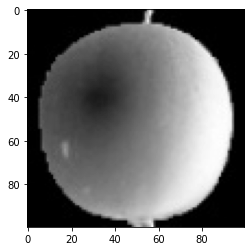

In [6]:
plt.imshow(fruits[0], cmap='gray')
plt.show()

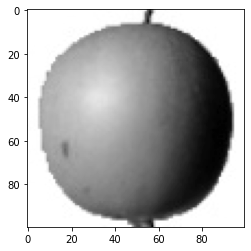

In [7]:
plt.imshow(fruits[0], cmap='gray_r')
plt.show()

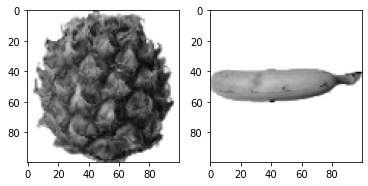

In [8]:
fig, axs = plt.subplots(1,2)
axs[0].imshow(fruits[100], cmap='gray_r')
axs[1].imshow(fruits[200], cmap='gray_r')
plt.show()

In [9]:
apple = fruits[0:100].reshape(-1, 100*100)
pineapple = fruits[100:200].reshape(-1, 100*100)
banana = fruits[200:300].reshape(-1, 100*100)

In [10]:
print(apple.shape)
print(pineapple.shape)
print(banana.shape)

(100, 10000)
(100, 10000)
(100, 10000)


In [11]:
print('apple\n\n',apple.mean(axis=1),'\n')
print('pineapple\n\n',pineapple.mean(axis=1),'\n')
print('banana\n\n',banana.mean(axis=1))

apple

 [ 88.3346  97.9249  87.3709  98.3703  92.8705  82.6439  94.4244  95.5999
  90.681   81.6226  87.0578  95.0745  93.8416  87.017   97.5078  87.2019
  88.9827 100.9158  92.7823 100.9184 104.9854  88.674   99.5643  97.2495
  94.1179  92.1935  95.1671  93.3322 102.8967  94.6695  90.5285  89.0744
  97.7641  97.2938 100.7564  90.5236 100.2542  85.8452  96.4615  97.1492
  90.711  102.3193  87.1629  89.8751  86.7327  86.3991  95.2865  89.1709
  96.8163  91.6604  96.1065  99.6829  94.9718  87.4812  89.2596  89.5268
  93.799   97.3983  87.151   97.825  103.22    94.4239  83.6657  83.5159
 102.8453  87.0379  91.2742 100.4848  93.8388  90.8568  97.4616  97.5022
  82.446   87.1789  96.9206  90.3135  90.565   97.6538  98.0919  93.6252
  87.3867  84.7073  89.1135  86.7646  88.7301  86.643   96.7323  97.2604
  81.9424  87.1687  97.2066  83.4712  95.9781  91.8096  98.4086 100.7823
 101.556  100.7027  91.6098  88.8976] 

pineapple

 [ 99.3239  87.1622  97.193   97.4689  98.8892  97.8819  95.1444 

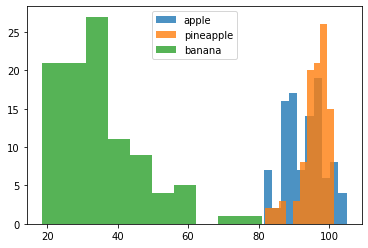

In [12]:
plt.hist(np.mean(apple, axis=1), alpha=0.8)
plt.hist(np.mean(pineapple, axis=1), alpha=0.8)
plt.hist(np.mean(banana, axis=1), alpha=0.8)
plt.legend(['apple', 'pineapple','banana'])
plt.show()

## banana는 구별이 되지만, apple, pineapple은 구별하기 쉽지가 않다.

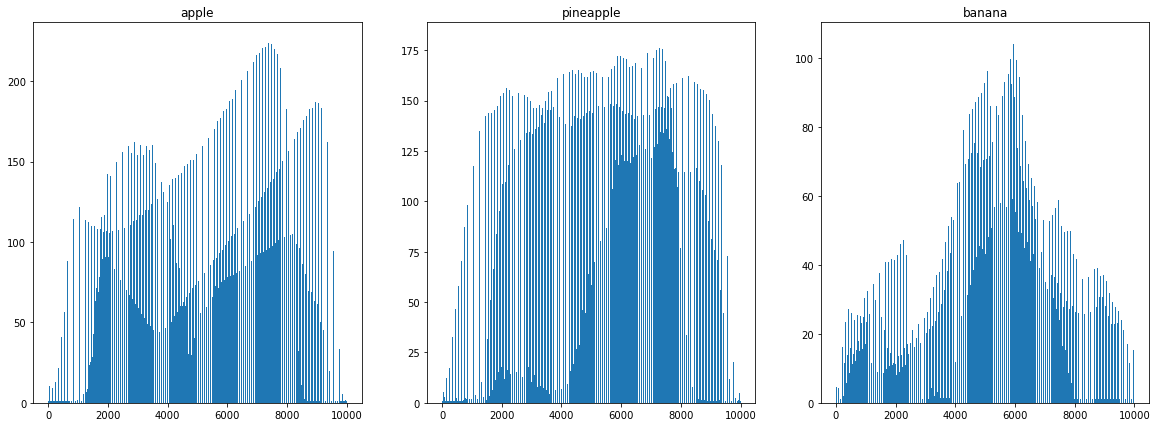

In [13]:
## 전체샘플에 대해 각 픽셀의 평균을 계산
fig, axs = plt.subplots(1,3,figsize= (20,7))
axs[0].bar(range(10000), np.mean(apple, axis=0))
axs[0].set_title("apple")
axs[1].bar(range(10000), np.mean(pineapple, axis=0))
axs[1].set_title("pineapple")
axs[2].bar(range(10000), np.mean(banana, axis=0))
axs[2].set_title("banana")
plt.show()

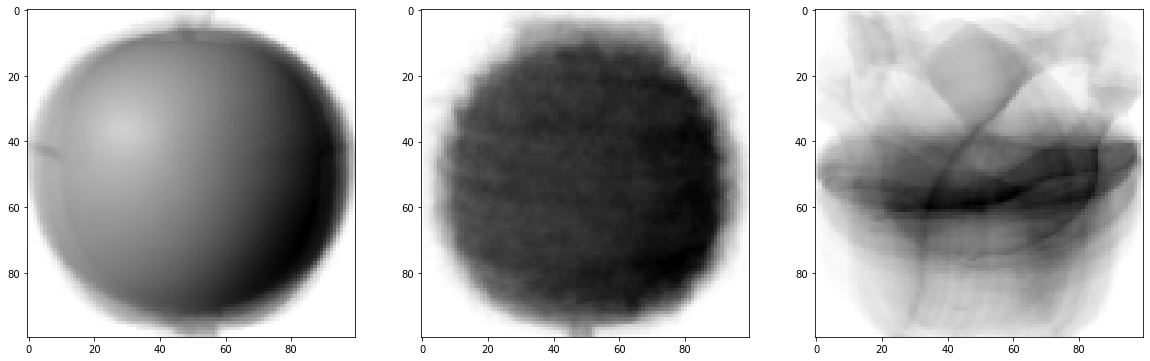

In [14]:
## 다시 픽셀 평균값을 100*100 크기로 바꾸어 이미지처럼 출력하여 그래프와 비교

apple_mean = np.mean(apple, axis=0).reshape(100,100)
pine_mean = np.mean(pineapple, axis=0).reshape(100,100)
banana_mean = np.mean(banana, axis=0).reshape(100,100)

fig, axs = plt.subplots(1,3,figsize=(20,7))
axs[0].imshow(apple_mean, cmap='gray_r')
axs[1].imshow(pine_mean, cmap='gray_r')
axs[2].imshow(banana_mean, cmap='gray_r')
plt.show()

In [15]:
abs_diff = np.abs(fruits - apple_mean)
abs_mean = np.mean(abs_diff, axis=(1,2))
print(abs_mean.shape)

(300,)


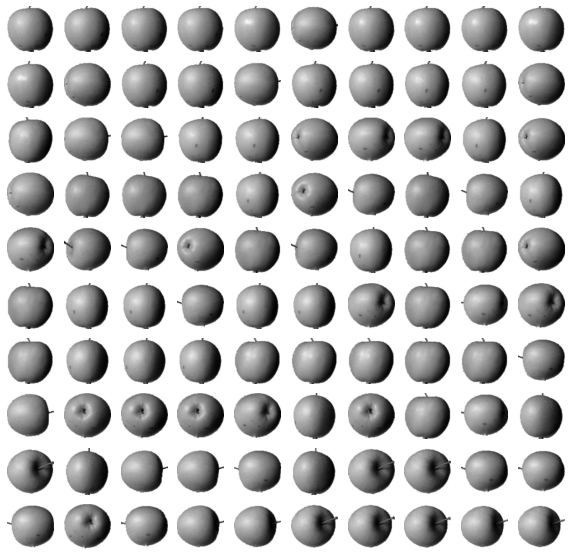

In [16]:
## 작은 순서대로 나열 100개 == apple_mean 과 오차가 가장 작은 샘플 100개를 고른다.

apple_index = np.argsort(abs_mean)[:100]
fig, axs = plt.subplots(10,10, figsize=(10,10))
for i in range(10):
    for j in range(10):
        axs[i,j].imshow(fruits[apple_index[i*10 + j]], cmap='gray_r') # i= 0 ~ 9,  j = 0 ~ 9 ==> 0,1,2,3,4,5,6,7,8,9......99 까지
        axs[i,j].axis('off') # 좌표축을 그리지않는다.
        
plt.show()

# K-평균
- 위의 내용들은 타깃값을 알고있었기 때문에 샘플의 평균값을 구할 수 있었지만, 실제 비지도 학습에서는 타깃값을 모르기때문에 구할 수 없다.
- K-평균 알고리즘을 이용

## KMeans Class

In [17]:
import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1,100*100)

In [18]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42) # n_clusters == labels_ 배열의 값
km.fit(fruits_2d)

KMeans(n_clusters=3, random_state=42)

In [19]:
print(km.labels_)

[2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 0 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


In [20]:
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([111,  98,  91]))


- label[0] = 111개의 샘플, label[1] = 98개, label[2] = 91개
- 각 클러스터가 어떤 이미지를 나타냈는지 그림으로 출력

In [21]:
import matplotlib.pyplot as plt
def draw_fruits(arr, ratio=1):
    n = len(arr)
    # 한줄에 10개씩 이미지
    rows = int(np.ceil(n/10))
    
    # row가 1개면 columns의 개수가 곧 샘플개수, 그렇지 않으면 10개
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols, figsize = (cols*ratio ,rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n: # n 개까지만 그린다.
                axs[i,j].imshow(arr[i*10+j], cmap = 'gray_r')
            axs[i,j].axis('off')
            
    plt.show()

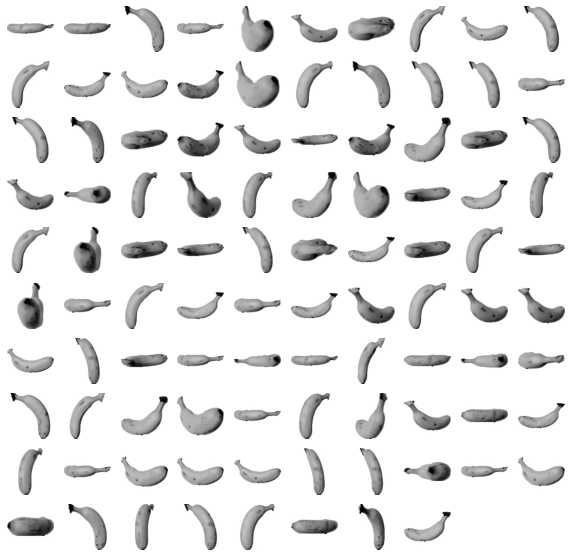

In [22]:
draw_fruits(fruits[km.labels_== 1])

### 클러스터 중심

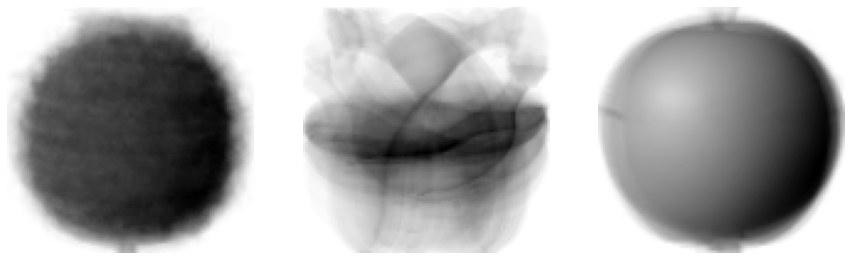

In [23]:
# fruits_2d샘플의 클러스터 중심이기 때문에 이미지로 출력하려면 100 X 100 크기의 2차원 배열로 바꿔야한다.
draw_fruits(km.cluster_centers_.reshape(-1, 100, 100), ratio=5)

In [24]:
print(km.transform(fruits_2d[100:101]))

[[3393.8136117  8837.37750892 5267.70439881]]


- 각 label[0], label[1], label[2] 와의 거리

In [25]:
print(km.predict(fruits_2d[100:101]))

[0]


- label[0]에 속한다라고 예측

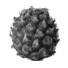

In [26]:
draw_fruits(fruits[100:101])

In [27]:
print(km.n_iter_) # 최적의 클러스터를 찾기위해 알고리즘이 반복한 횟수

4


### 최적의 k 찾기

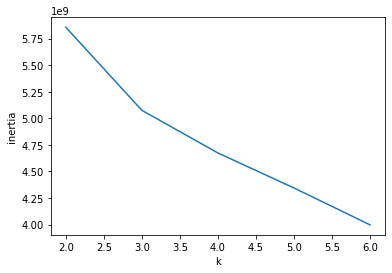

In [28]:
inertia = []
for k in range(2,7):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(fruits_2d)
    inertia.append(km.inertia_)

plt.plot(range(2,7), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

- inertia
- k=3 지점에서 그래프의 기울기가 바뀐걸 볼 수 있다.

# 주성분 분석

### 차원과 차원축소

- 주성분분석 (PCA) : 분산이 큰 방향을 찾는것으로 이해

In [29]:
import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1,100*100)

In [30]:
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=50) # 차원지정
pca.fit(fruits_2d)

PCA(n_components=50)

In [31]:
print(pca.components_.shape) # 50개의 주성분

(50, 10000)


In [32]:
def draw_fruits(arr, ratio=1):
    n = len(arr)
    # 한줄에 10개씩 이미지
    rows = int(np.ceil(n/10))
    
    # row가 1개면 columns의 개수가 곧 샘플개수, 그렇지 않으면 10개
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols, figsize = (cols*ratio ,rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n: # n 개까지만 그린다.
                axs[i,j].imshow(arr[i*10+j], cmap = 'gray_r')
            axs[i,j].axis('off')
            
    plt.show()

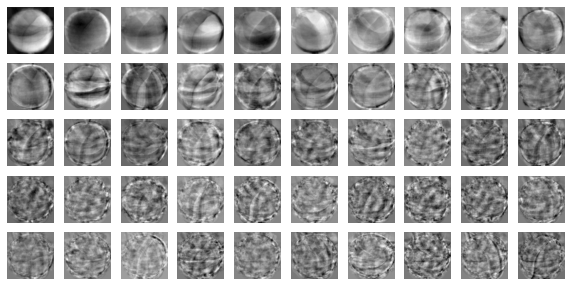

In [33]:
draw_fruits(pca.components_.reshape(-1,100, 100))

In [34]:
print(fruits_2d.shape)

(300, 10000)


In [35]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


### 원본데이터 재구성
- pca.inverse_transform()

In [36]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


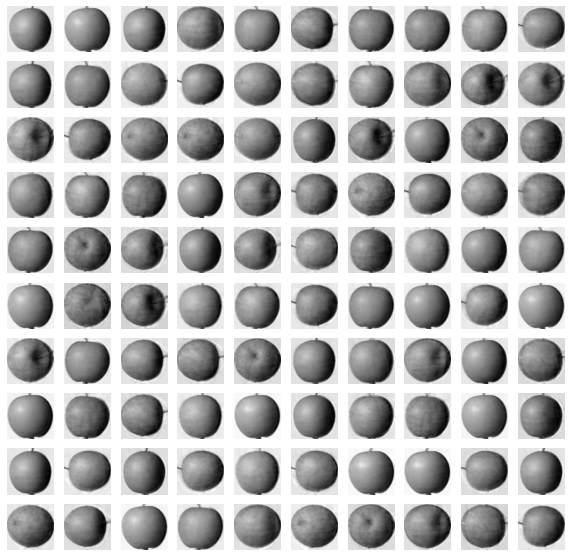

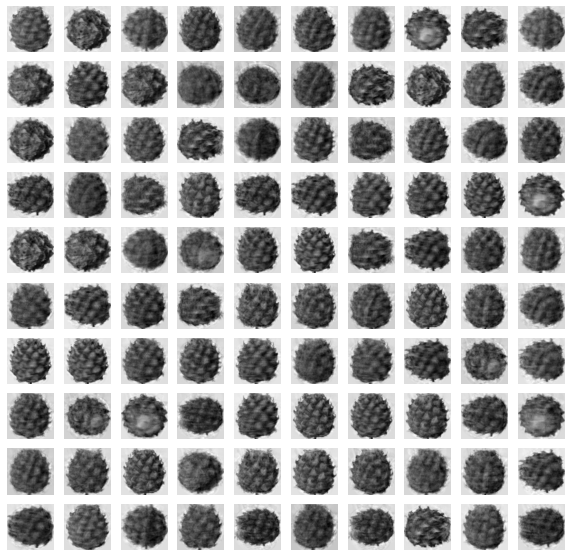

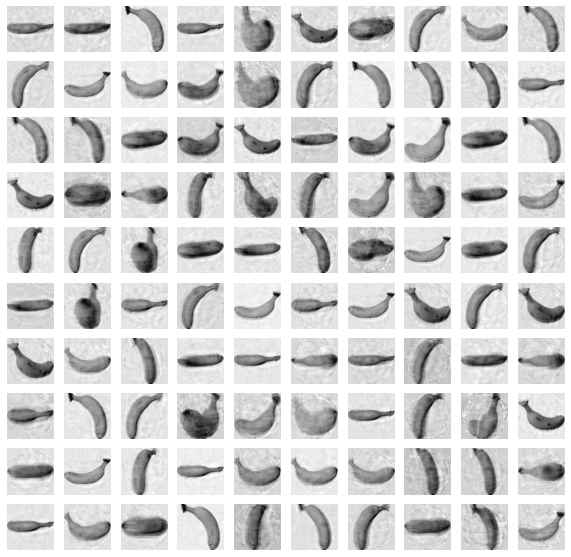

In [37]:
fruits_reconstruct = fruits_inverse.reshape(-1,100,100)
for start in [0,100,200]: 
    draw_fruits(fruits_reconstruct[start:start+100])
    print('\n')

### 원본데이터의 분산을 얼마나 잘나타내는지 기록한 값을 explained variance
- explained_variance_ratio_

In [38]:
print(np.sum(pca.explained_variance_ratio_)) # 분산비율을 더하면 주성분으로 표현하고 있는 총 분산 비율을 얻음

0.921504046130164


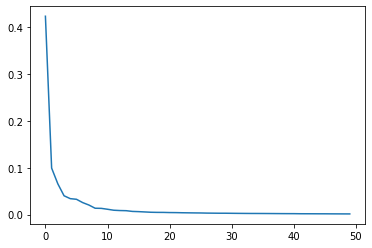

In [40]:
# 분산의 비율을 그래프로 그려보면 적절한 주성분의 개수를 찾는 데 도움된다.
plt.plot(pca.explained_variance_ratio_)
plt.show()

### 원본데이터와 pca 데이터를 지도학습에 적용해 보고 어떤 차이가 있는지

In [41]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [42]:
target = np.array([0]*100 + [1]*100 + [2]*100)

In [50]:
## 원본데이터
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
0.291380500793457


In [51]:
## PCA 데이터
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.022527694702148438


In [52]:
## 설명된 분산의 50%에 달하는 주성분을 찾도록 PCA 모델만들기
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [55]:
print(pca.n_components_)

2


- 2개의 특성만으로 원본 데이터에 있는 분산의 50%를 표현할 수 있다는 뜻

In [56]:
## 원본데이터를 변환, 주성분이 2개이므로 변환된 데이터의 크기는 (300,2)
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [58]:
## 교차검증의 결과 확인
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.99
0.03689355850219726


/Users/yonghyunpark/opt/anaconda3/envs/deeplearning/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/yonghyunpark/opt/anaconda3/envs/deeplearning/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:


In [59]:
## 차원 축소된 데이터를 사용해 k-평균 알고리즘으로 클러스터 찾기
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


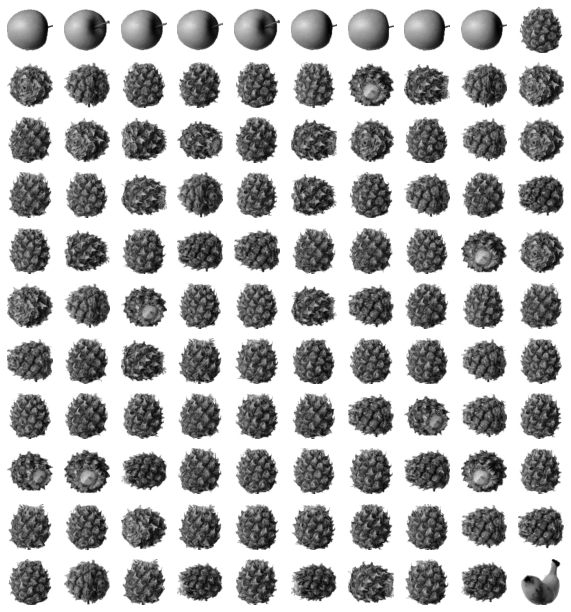

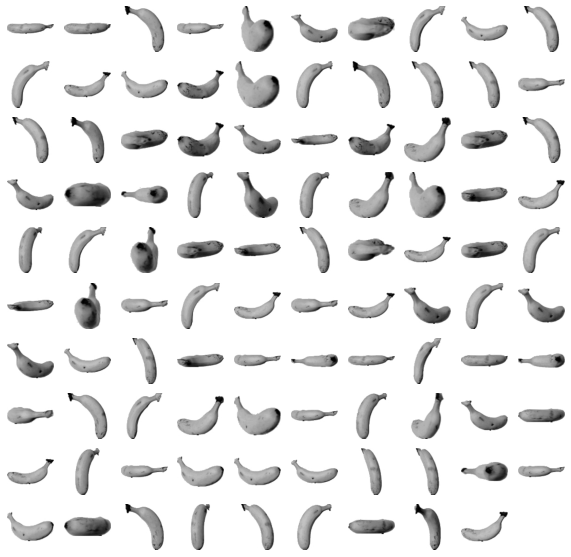

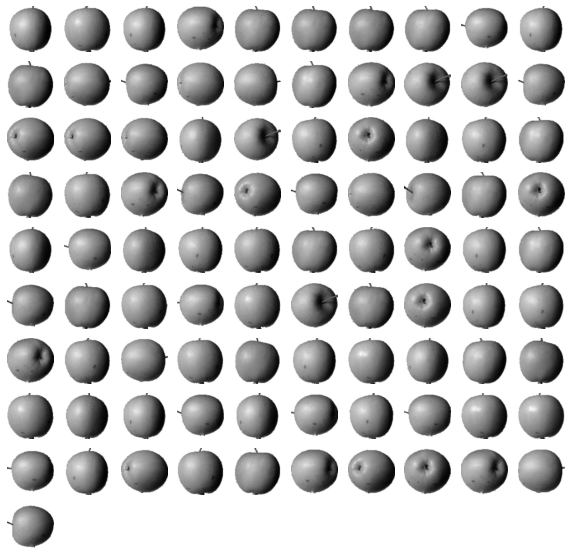

In [60]:
for label in range(0,3):
    draw_fruits(fruits[km.labels_ == label])
    print('\n')

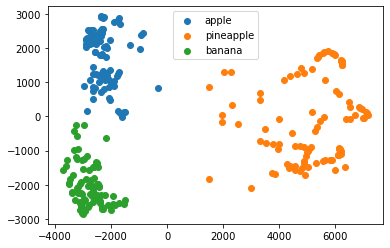

In [73]:
for label in range(0,3):
    data = fruits_pca[km.labels_==label]
    plt.scatter(data[:,0], data[:,1])
plt.legend(['apple', 'pineapple', 'banana'])
plt.show()

In [82]:
print('data[:,0] = \n\n',data[:,0])
print('data[:,1] = \n\n',data[:,1])

data[:,0] = 

 [-2778.41779459 -3078.27365136 -2620.61072939 -3113.71771062
 -2520.64705144 -2711.38755162 -2884.74283654 -2310.99240338
 -1521.26665012 -2486.91643797 -2800.83912843 -2810.56248913
 -2209.09841637 -2917.38810303 -2198.1718942  -2317.61818126
 -3289.84664277 -3563.8760831  -3708.64597097 -2423.96625858
 -3169.13983546 -3059.33441459 -2745.8264558  -3185.62291444
 -2971.17053083 -2787.48896668 -3498.88592281 -3260.68825045
 -2623.54750342 -2307.99121345 -3252.36170036 -3084.49971083
 -3201.14329072 -2608.40877513 -3390.8727361  -1924.69875845
 -2972.89461453 -3093.63044684 -2362.84106804 -3454.4640671
 -2963.2919212  -1849.83696122 -3331.10399431 -2512.78278467
 -3055.78042415 -2402.09327255 -2940.30972889 -3015.21904761
 -2451.83076426 -2310.61720894 -2510.66697894 -2633.2859714
 -3080.23345665 -2123.66302259 -3072.09843543 -3617.74117713
 -2681.08615892 -3497.79088896 -2506.71316197 -2673.05168548
 -3118.54949968 -2812.96562258 -2543.74538773 -3089.33634796
 -3224.6194